# Classification Examples

In [1]:
# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from slickml.classification import XGBoostCVClassifier

# XGBoostCVClassifier

## Example 1

In [3]:
# loading data
df = pd.read_csv("../data/dummy_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [4]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [6]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 191 -*- 4-Folds CV LOGLOSS: Train = 0.232 +/- 0.008 -*- Test = 0.320 +/- 0.025 *-*


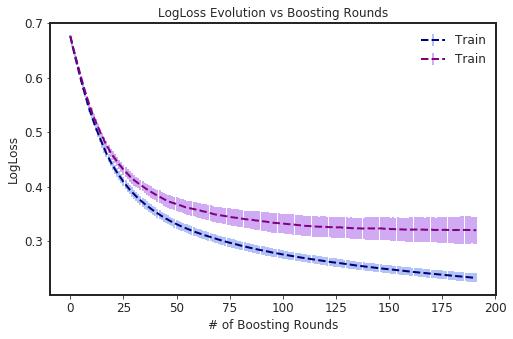

In [7]:
clf.plot_cv_results()

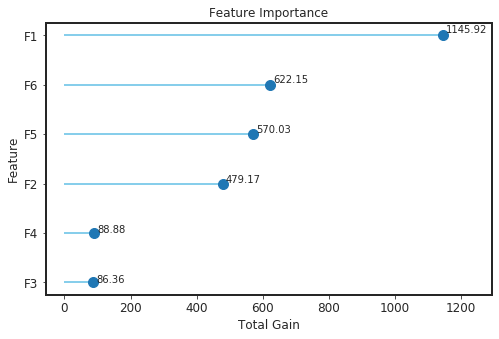

In [8]:
clf.plot_feature_importance()

In [9]:
# predic proba (or clf.predict_proba_)
pred_proba = clf.predict_proba(X_test, y_test)
pred_proba[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

In [10]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
187,0.233434,0.008174,0.320090,0.025060
188,0.233021,0.008195,0.320024,0.024866
189,0.232621,0.008224,0.320062,0.024701
190,0.232216,0.008193,0.319890,0.024903
191,0.231895,0.008241,0.319651,0.024945


In [11]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1145.921151
1,F6,622.148287
2,F5,570.030153
3,F2,479.170822
4,F4,88.880518
5,F3,86.359118


In [12]:
import shap

In [13]:
exp = shap.TreeExplainer(bst)
exp_vals = exp.shap_values(X_test)
shap.summary_plot(exp_vals, X_test)

NameError: name 'bst' is not defined